In [28]:
## import cv2
## import numpy
## import matplotlib pyplot
## import KMeans cluster from sklearn
## import distance from scipy.spatial
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [29]:
import wandb
wandb.login(key="6e5f3abd444a4d6807a625b87b908f3b6705b69e")
wandb.init(project='distance_classification_project')

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


In [30]:
## Reading the image plaksha_Faculty.jpg
faculty_img = cv2.imread("/Users/arsharora/Desktop/python sem4/MLPR LAB/Plaksha_Faculty.jpg")
tharoor_img = cv2.imread("/Users/arsharora/Desktop/python sem4/MLPR LAB/Dr_Shashi_Tharoor.jpg")

## Convert the image to grayscale
gray_faculty = cv2.cvtColor(faculty_img, cv2.COLOR_BGR2GRAY)
gray_tharoor = cv2.cvtColor(tharoor_img, cv2.COLOR_BGR2GRAY)

# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_faculty, 1.05, 4, minSize=(25,25), maxSize=(50,50))
tharoor_face = face_cascade.detectMultiScale(gray_tharoor, 1.05, 4)

# Define the text and font parameters
text = "Detected Face" ## The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX ## Font type
font_scale = 0.5 ## Font scale factor
font_color = (0, 0, 255) ## Text color in BGR format (here, it's red)
font_thickness =  2 # Thickness of the text
  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(faculty_img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(faculty_img, text, (x, y - 10), font, font_scale, font_color, font_thickness)
    
## Display the image and window title should be "Total number of face detected are #"  
cv2.imshow(f"Total number of faces detected are {faces_rect}", faculty_img)
cv2.waitKey(5000)
cv2.destroyAllWindows()

Skipping empty face region at (654, 265, 31, 31)
Skipping empty face region at (500, 266, 30, 30)
Skipping empty face region at (892, 267, 31, 31)
Skipping empty face region at (576, 253, 32, 32)
Skipping empty face region at (812, 274, 34, 34)
Skipping empty face region at (1003, 273, 32, 32)
Skipping empty face region at (732, 278, 33, 33)
Skipping empty face region at (409, 277, 28, 28)
Skipping empty face region at (464, 296, 33, 33)
Skipping empty face region at (632, 328, 34, 34)
Skipping empty face region at (547, 300, 34, 34)
Skipping empty face region at (819, 337, 33, 33)
Skipping empty face region at (893, 327, 36, 36)
Skipping empty face region at (731, 316, 40, 40)
Skipping empty face region at (925, 353, 38, 38)
Skipping empty face region at (1095, 361, 33, 33)
Skipping empty face region at (1019, 348, 40, 40)
Skipping empty face region at (570, 426, 39, 39)
Skipping empty face region at (477, 407, 36, 36)
Skipping empty face region at (262, 410, 41, 41)
Skipping empty fa

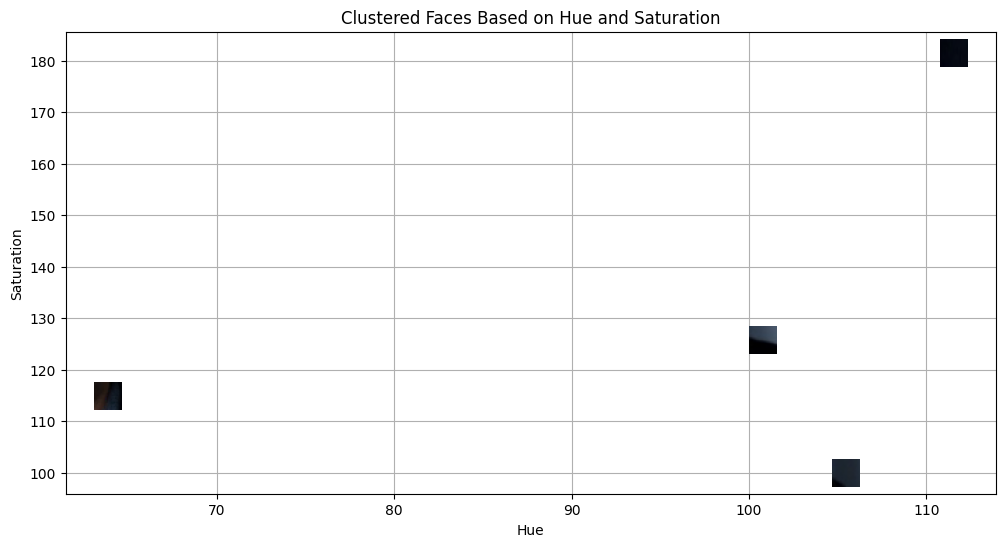

30
4
4


In [33]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(tharoor_img, cv2.COLOR_BGR2HSV)  ## Convert image from BGR to HSV
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    
    # Skip empty face regions
    if face.size == 0:
        print(f"Skipping empty face region at ({x}, {y}, {w}, {h})")
        continue
    
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    
    # Skip NaN values
    if np.isnan(hue) or np.isnan(saturation):
        print(f"Skipping face with NaN hue/saturation at ({x}, {y}, {w}, {h})")
        continue

    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

# Check if we have enough valid face data to cluster
if len(hue_saturation) == 0:
    print("No valid face regions to cluster. Exiting.")
    exit()

# Perform k-Means clustering on valid hue_saturation data
kmeans = KMeans(n_clusters=min(2, len(hue_saturation)), random_state=42).fit(hue_saturation)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Only plot faces that were successfully processed
valid_faces = min(len(face_images), len(hue_saturation))

for i in range(valid_faces):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color='red' if kmeans.labels_[i] == 0 else 'blue')

## Add plot labels
plt.xlabel('Hue')
plt.ylabel('Saturation')
plt.title('Clustered Faces Based on Hue and Saturation')
plt.grid()
plt.show()

# Let me know if you’d like any adjustments or explanations! 🚀
print(len(faces_rect))
print(len(kmeans.labels_))
print(len(hue_saturation))


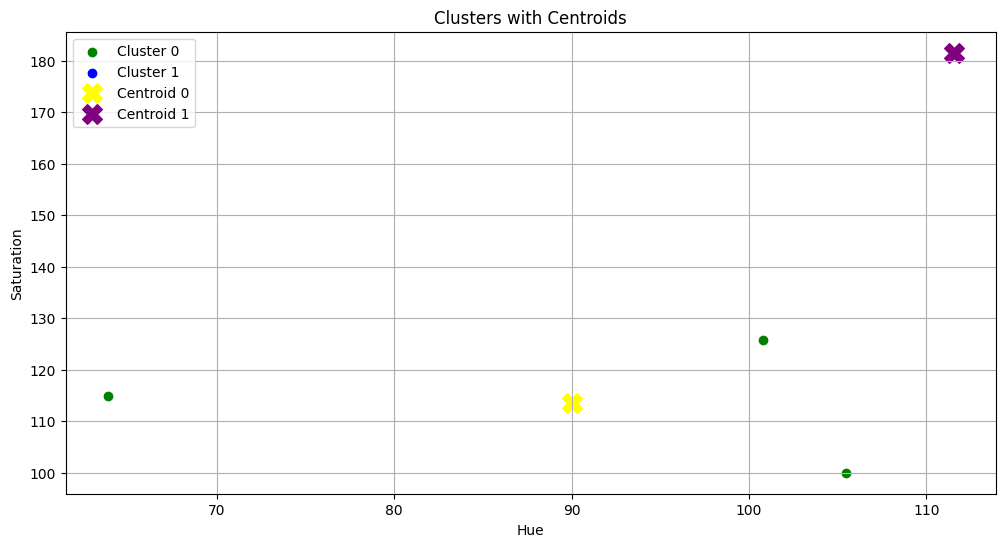

In [34]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i in range(len(kmeans.labels_)):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label='Cluster 0')

cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label='Cluster 1')

# Calculate and plot centroids
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], c='yellow', marker='X', s=200, label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], c='purple', marker='X', s=200, label='Centroid 1')

plt.xlabel('Hue')
plt.ylabel('Saturation')
plt.title('Clusters with Centroids')
plt.legend()
plt.grid()
plt.show()

## Put x label
## Put y label
## Put title
## Add a legend
## Add grid
## Show the plot


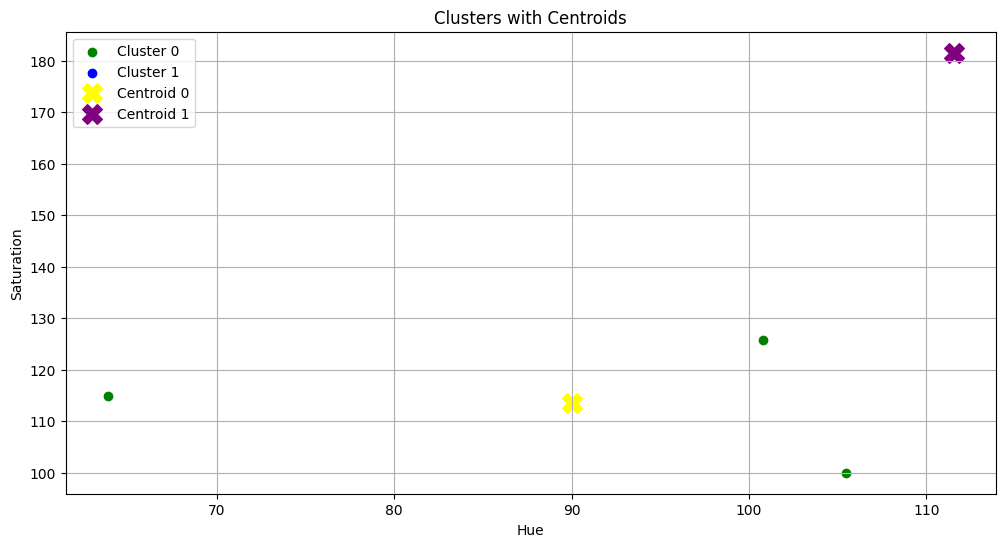

In [35]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))

# Only iterate through valid detected faces
valid_faces = min(len(faces_rect), len(kmeans.labels_))

for i in range(valid_faces):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
if len(cluster_0_points) > 0:
    plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label='Cluster 0')

cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
if len(cluster_1_points) > 0:
    plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label='Cluster 1')

# Calculate and plot centroids
if len(kmeans.cluster_centers_) >= 2:
    centroid_0 = kmeans.cluster_centers_[0]
    centroid_1 = kmeans.cluster_centers_[1]
    plt.scatter(centroid_0[0], centroid_0[1], c='yellow', marker='X', s=200, label='Centroid 0')
    plt.scatter(centroid_1[0], centroid_1[1], c='purple', marker='X', s=200, label='Centroid 1')

plt.xlabel('Hue')
plt.ylabel('Saturation')
plt.title('Clusters with Centroids')
plt.legend()
plt.grid()
plt.show()



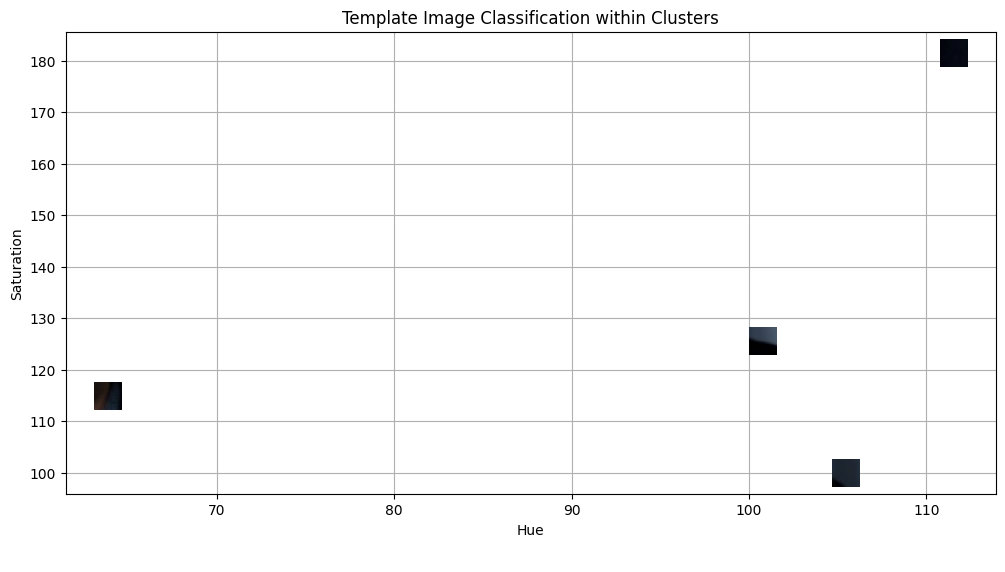

In [36]:
# Convert the template image to HSV color space and store it in template_hsv
template_img = tharoor_img
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Only iterate through valid detected faces
valid_faces = min(len(faces_rect), len(kmeans.labels_))

for i in range(valid_faces):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if not np.isnan(template_hue) and not np.isnan(template_saturation):
    color = 'red' if template_label == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
    ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
    ax.add_artist(ab)

plt.xlabel('Hue')
plt.ylabel('Saturation')
plt.title('Template Image Classification within Clusters')
plt.grid()
plt.show()

# Let me know if this works or if you want me to refine it further! 🚀


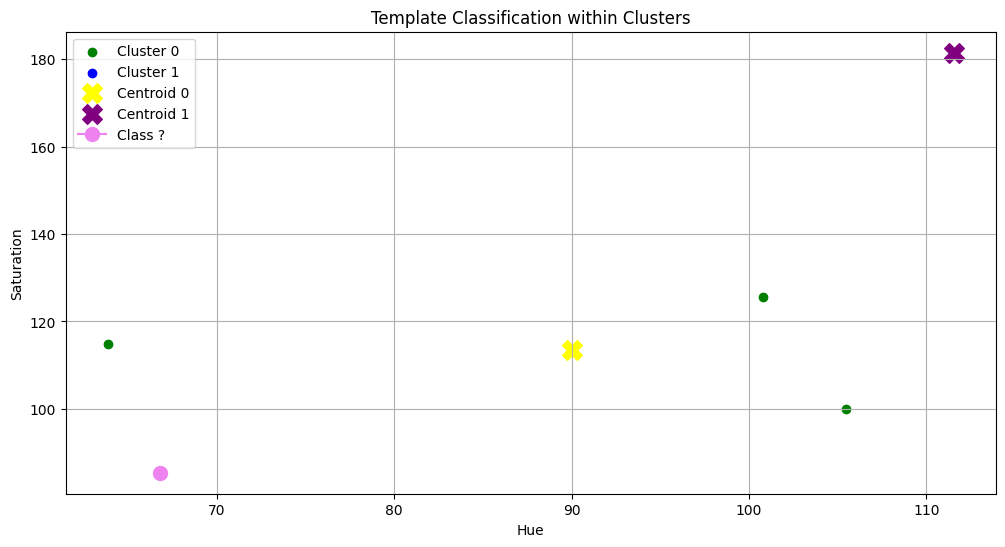

In [37]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))

# Only iterate through valid detected faces
valid_faces = min(len(faces_rect), len(kmeans.labels_), len(hue_saturation))

for i in range(valid_faces):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
if len(cluster_0_points) > 0:
    cluster_0_points = np.array(cluster_0_points)
    plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label='Cluster 0')

# Plot points for cluster 1 in blue
if len(cluster_1_points) > 0:
    cluster_1_points = np.array(cluster_1_points)
    plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label='Cluster 1')

# Calculate and plot centroids for both the clusters
if len(kmeans.cluster_centers_) >= 2:
    centroid_0 = kmeans.cluster_centers_[0]
    centroid_1 = kmeans.cluster_centers_[1]
    plt.scatter(centroid_0[0], centroid_0[1], c='yellow', marker='X', s=200, label='Centroid 0')
    plt.scatter(centroid_1[0], centroid_1[1], c='purple', marker='X', s=200, label='Centroid 1')

# Plot the template point if valid
if not np.isnan(template_hue) and not np.isnan(template_saturation):
    plt.plot(template_hue, template_saturation, marker='o', c='violet', markersize=10, label='Class ?')

plt.xlabel('Hue')
plt.ylabel('Saturation')
plt.title('Template Classification within Clusters')
plt.grid()
plt.legend()
plt.show()